<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [90]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.formula.api import ols

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?
Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Overview of Project Tasks
Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: Generate basic statistics and visualizations for upper management. 

Task 3: Use the appropriate tests to answer the questions provided.

Task 4: Share your Jupyter Notebook.

 This project is worth 15% of your final grade. Detailed instructions for each of these tasks follow.

Go to next item


#### Task 1

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


#### Task 2

[[Text(0, 0, 'Not adjacent to Charles River'),
  Text(1, 0, 'Adjacent to Charles River')],
 Text(0.5, 1.0, 'Median value of owner-occupied homes boxplot')]

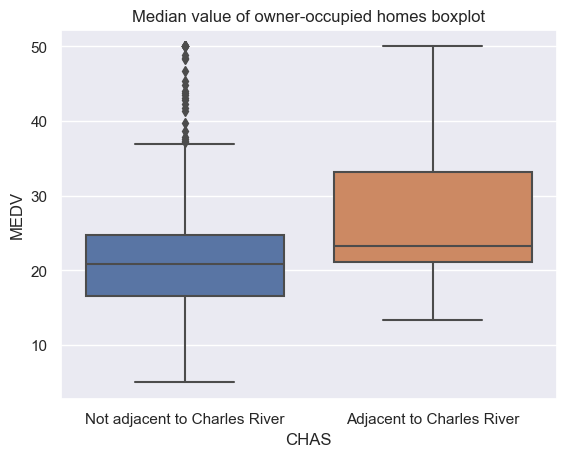

In [77]:
MEDV_boxplot = sns.boxplot(y='MEDV',x='CHAS',data=boston_df)

MEDV_boxplot.set(xticklabels=['Not adjacent to Charles River', 'Adjacent to Charles River'],
                 title='Median value of owner-occupied homes boxplot')


[[Text(0, 0, 'Not adjacent to Charles River'),
  Text(1, 0, 'Adjacent to Charles River')]]

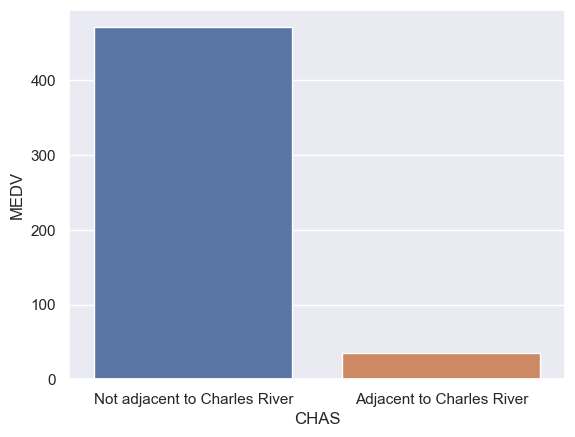

In [79]:
sns.set(style="darkgrid")

CHAS_boxplot = sns.barplot(x='CHAS',y='MEDV',data=x)

CHAS_boxplot.set(xticklabels=['Not adjacent to Charles River', 'Adjacent to Charles River'])

In [54]:
boston_df.loc[(boston_df['AGE'] <= 35),'AGE_group'] = '35 years and younger'

boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),'AGE_group'] = 'between 35 and 70 years'

boston_df.loc[(boston_df['AGE'] >= 70),'AGE_group'] = '70 years and old'

[Text(0.5, 0, 'Age groups'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes vs AGE')]

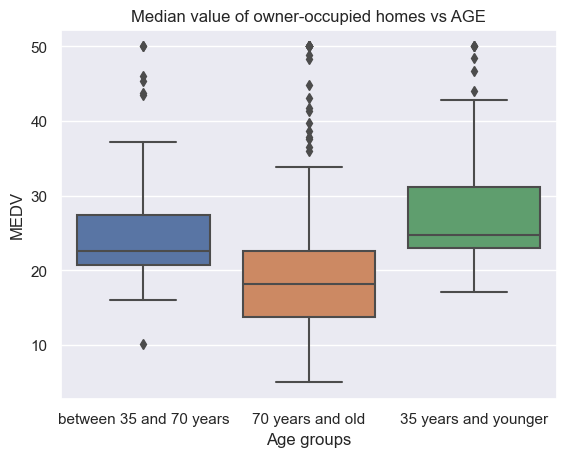

In [81]:
MEDV_vs_AGE = sns.boxplot(x='AGE_group',y='MEDV',data=boston_df)

MEDV_vs_AGE.set(xlabel='Age groups',title='Median value of owner-occupied homes vs AGE')

'\nThe scatter plot suggests a general trend where towns with higher proportions of non-retail business \nacres have higher nitric oxide concentrations, \nbut the relationship is not perfectly linear, and other factors may be influencing the NOX levels.\n'

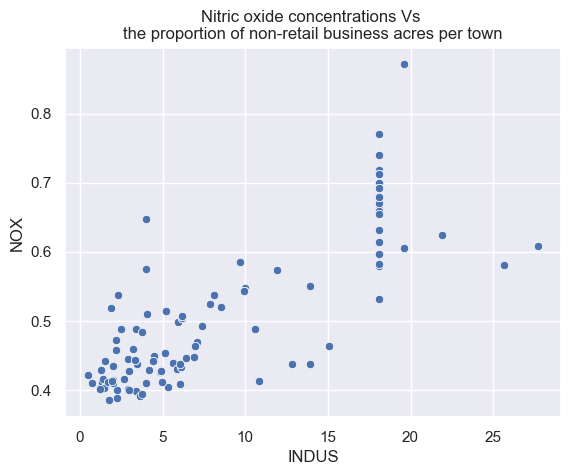

In [82]:
NOX_vs_INDUS = sns.scatterplot(y='NOX',x='INDUS',data=boston_df)

NOX_vs_INDUS.set(title='Nitric oxide concentrations Vs \nthe proportion of non-retail business acres per town')

"""
The scatter plot suggests a general trend where towns with higher proportions of non-retail business 
acres have higher nitric oxide concentrations, 
but the relationship is not perfectly linear, and other factors may be influencing the NOX levels.
"""

/Users/jahdovanterpool/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Pupil to teacher ratio'),
 Text(0.5, 1.0, 'Pupil to teacher ratio histogram')]

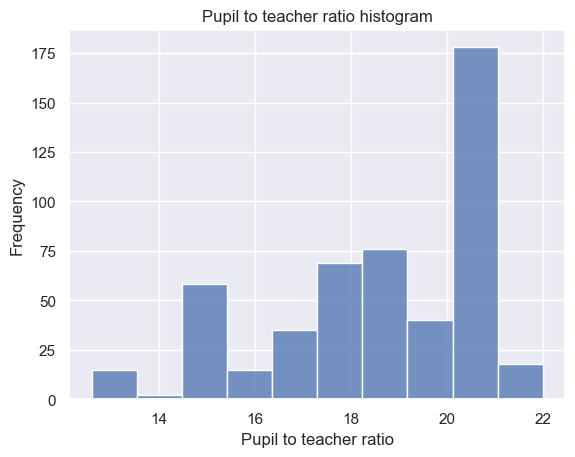

In [86]:
PTRATIO_hist = sns.histplot(boston_df['PTRATIO'],bins=10,kde=False)

PTRATIO_hist.set(ylabel = 'Frequency',xlabel='Pupil to teacher ratio',title='Pupil to teacher ratio histogram')

#### Task 3

In [99]:
t_stat,p_value= ss.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
             boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=True)

print(f'The t-statistic is: {t_stat} & the p value is {p_value}')


"""
Since the p-value is less than 5% we can say that there is a significant differnce
"""

The t-statistic is: -3.996437466090509 & the p value is 7.390623170519902e-05


'\nSince the p-value is less than 5% we can say that there is a significant differnce\n'

In [120]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and old
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and old
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and old
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and old


In [121]:
seventy_older = boston_df[boston_df['AGE_group'] == '70 years and old']['MEDV']
thirtyfive_under = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV']

In [123]:
f_statistic, p_value = scipy.stats.f_oneway(seventy_older,thirtyfive_seventy,thirtyfive_under)

print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

"""
Since the p-value is less than 0.05, we can reject the null hypothesis as there
is sufficient evidence that at least one of the age group's median values of houses is differen
"""

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


"\nSince the p-value is less than 0.05, we can reject the null hypothesis as there\nis sufficient evidence that at least one of the age group's median values of houses is differen\n"

In [124]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

"""
Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that there is a relationship between Nitric oxide concentrations 
and proportion of non-retail business acres per town
"""

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

In [126]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])
"""
Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence 
that there is an impact of an additional weighted distance to the five Boston 
employment centres on the median value of owner occupied homes.
"""

PearsonRResult(statistic=0.24992873408590383, pvalue=1.2066117273371446e-08)